In [2]:
!pip install torch
!pip install kmeans-pytorch


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd

articles_df = pd.read_csv("full_model_documents_classified.csv")

In [35]:
embeddings = pd.read_pickle('clean_2020articles_w_title_embeddings.pkl')
count_src = embeddings.groupby("source").count().sort_values(by="source", ascending=False)
count_src

,uuid,year,article_text,title,title_text,bert_sentence_embedding_title_only
source,,,,,,
wp,5,5,5,5,5,5
washtimes,5441,5441,5441,5441,5441,5441
thehill,2,2,2,2,2,2
npr,2858,2858,2858,2858,2858,2858
fox,4069,4069,4069,4069,4069,4069
dailycaller,8004,8004,7996,8004,8004,8004
breitbart,16642,16642,16641,16642,16642,16642
bbc,23,23,23,23,23,23


In [5]:
articles_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"trump shifts tone, says he’s ‘proud’ of fed am...",-1,-1_the_and_in_to,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",['report: doj opened separate probe into hunte...,the - and - in - to - of - on - that - for - i...,0.000000,False
1,"iran paid bounties for targeting us troops, in...",172,172_bounties_bounty_russia_intelligence,"['bounties', 'bounty', 'russia', 'intelligence...",[' james inhofe vows ‘strong response...,bounties - bounty - russia - intelligence - ru...,0.391835,False
2,us forces rescue american citizen held hostage...,-1,-1_the_and_in_to,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",['report: doj opened separate probe into hunte...,the - and - in - to - of - on - that - for - i...,0.000000,False
3,"trump slams relief bill, calls on congress to ...",2,2_relief_package_stimulus_trillion,"['relief', 'package', 'stimulus', 'trillion', ...",['house passes $3 trillion coronavirus relief ...,relief - package - stimulus - trillion - bill ...,1.000000,False
4,naomi osaka withdraws from french open to focu...,1,1_mask_masks_wear_wearing,"['mask', 'masks', 'wear', 'wearing', 'mandate'...","['donald trump: wear a mask, they have an impa...",mask - masks - wear - wearing - mandate - face...,0.213468,False
...,...,...,...,...,...,...,...,...
37039,listen: 2020 republican national convention by...,-1,-1_the_and_in_to,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",['report: doj opened separate probe into hunte...,the - and - in - to - of - on - that - for - i...,0.000000,False
37040,new poll: americans overwhelmingly support vot...,280,280_ballots_mailin_voting_absentee,"['ballots', 'mailin', 'voting', 'absentee', 'm...","['more than 35,000 ballots uncounted in florid...",ballots - mailin - voting - absentee - mail - ...,0.903216,False
37041,biden to pick north carolina regulator michael...,27,27_climate_oil_environmental_change,"['climate', 'oil', 'environmental', 'change', ...",['john kerry: paris climate accord ‘is not eno...,climate - oil - environmental - change - energ...,1.000000,False
37042,harris: 'you ushered in a new day for america'...,16,16_harris_kamala_mate_running,"['harris', 'kamala', 'mate', 'running', 'vice'...","[""5 takeaways on the new biden-harris presiden...",harris - kamala - mate - running - vice - dca ...,0.566861,False


In [6]:
merged_df = pd.merge(articles_df, embeddings, right_index=True,left_index=True)
COLS_TO_KEEP = ["Document","Topic","Representation","Top_n_words",
                "Probability","source","title","article_text","title_text"]
merged_df = merged_df[COLS_TO_KEEP]
merged_df

,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text
0,"trump shifts tone, says he’s ‘proud’ of fed am...",-1,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",the - and - in - to - of - on - that - for - i...,0.000000,wp,"trump shifts tone, says he’s ‘proud’ of fed am...",president trump on monday said he was “proud” ...,"trump shifts tone, says he’s ‘proud’ of fed am..."
1,"iran paid bounties for targeting us troops, in...",172,"['bounties', 'bounty', 'russia', 'intelligence...",bounties - bounty - russia - intelligence - ru...,0.391835,wp,"iran paid bounties for targeting us troops, in...",u.s. intelligence reportedly indicates iran’s ...,"iran paid bounties for targeting us troops, in..."
2,us forces rescue american citizen held hostage...,-1,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",the - and - in - to - of - on - that - for - i...,0.000000,wp,us forces rescue american citizen held hostage...,u.s. forces have rescued an american citizen h...,us forces rescue american citizen held hostage...
3,"trump slams relief bill, calls on congress to ...",2,"['relief', 'package', 'stimulus', 'trillion', ...",relief - package - stimulus - trillion - bill ...,1.000000,thehill,"trump slams relief bill, calls on congress to ...",president trump on tuesday evening blasted con...,"trump slams relief bill, calls on congress to ..."
4,naomi osaka withdraws from french open to focu...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.213468,thehill,naomi osaka withdraws from french open to focu...,japanese tennis star naomi osaka has withdrawn...,naomi osaka withdraws from french open to focu...
...,...,...,...,...,...,...,...,...,...
37039,listen: 2020 republican national convention by...,-1,"['the', 'and', 'in', 'to', 'of', 'on', 'that',...",the - and - in - to - of - on - that - for - i...,0.000000,npr,listen: 2020 republican national convention,by \n npr staff\n \n \n ...,listen: 2020 republican national convention by...
37040,new poll: americans overwhelmingly support vot...,280,"['ballots', 'mailin', 'voting', 'absentee', 'm...",ballots - mailin - voting - absentee - mail - ...,0.903216,npr,new poll: americans overwhelmingly support vot...,\n \n miles parks\n \n \n ...,new poll: americans overwhelmingly support vot...
37041,biden to pick north carolina regulator michael...,27,"['climate', 'oil', 'environmental', 'change', ...",climate - oil - environmental - change - energ...,1.000000,npr,biden to pick north carolina regulator michael...,\n \n rebecca hersher\n \n \n ...,biden to pick north carolina regulator michael...
37042,harris: 'you ushered in a new day for america'...,16,"['harris', 'kamala', 'mate', 'running', 'vice'...",harris - kamala - mate - running - vice - dca ...,0.566861,npr,harris: 'you ushered in a new day for america',by \n \n amita kelly\n \n \n ...,harris: 'you ushered in a new day for america'...


In [7]:
#Retrieve cluster #1 that contains covid related news
import itertools

covid_df = merged_df[merged_df["Topic"]==1]
covid_df


,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text
4,naomi osaka withdraws from french open to focu...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.213468,thehill,naomi osaka withdraws from french open to focu...,japanese tennis star naomi osaka has withdrawn...,naomi osaka withdraws from french open to focu...
108,elizabeth warren photographed maskless at wedd...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,elizabeth warren photographed maskless at wedd...,photos show democratic massachusetts sen. eliz...,elizabeth warren photographed maskless at wedd...
160,‘not based on science’: rep. massie refuses pe...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘not based on science’: rep. massie refuses pe...,republican kentucky rep. thomas massie critici...,‘not based on science’: rep. massie refuses pe...
161,‘you don’t tell me what to f**king do!’: eric ...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘you don’t tell me what to f**king do!’: eric ...,democratic california rep. eric swalwell rebuf...,‘you don’t tell me what to f**king do!’: eric ...
248,editor daily rundown: kristi noem tells gov. a...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.987761,dailycaller,editor daily rundown: kristi noem tells gov. a...,"‘neanderthal thinking’: biden, white house bas...",editor daily rundown: kristi noem tells gov. a...
...,...,...,...,...,...,...,...,...,...
36702,justice scalia's son apologizes to his parish ...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,justice scalia's son apologizes to his parish ...,\n \n carrie johnson\n \n \n ...,justice scalia's son apologizes to his parish ...
36742,"in europe, cautious steps away from coronaviru...",1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,"in europe, cautious steps away from coronaviru...",\n \n laurel wamsley\n \n \n ...,"in europe, cautious steps away from coronaviru..."
36792,nancy pelosi calls trump 'cowardly' for not we...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,nancy pelosi calls trump 'cowardly' for not we...,by \n \n alana wise\n \n \n ...,nancy pelosi calls trump 'cowardly' for not we...
36834,coronavirus and super tuesday voting: it's tou...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.703432,npr,coronavirus and super tuesday voting: it's touchy,by \n \n pam fessler\n \n \n ...,coronavirus and super tuesday voting: it's tou...


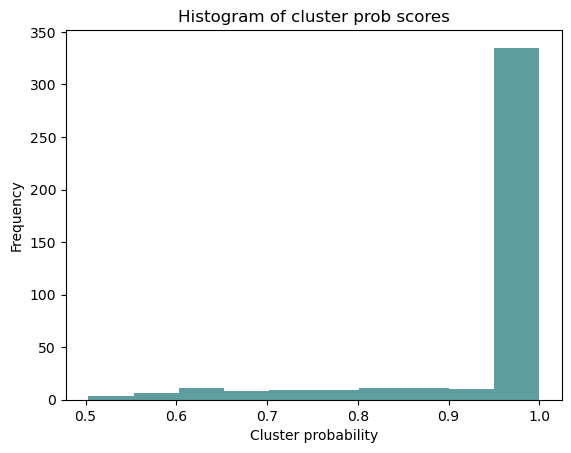

In [57]:
import matplotlib.pyplot as plt

plt.hist(covid_df["Probability"], bins=10, color='cadetblue')
plt.xlabel("Cluster probability")
plt.ylabel("Frequency")
plt.title("Histogram of cluster prob scores")
plt.show()

In [10]:
covid_df = covid_df[covid_df["Probability"]>=0.5]
covid_df

,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text
108,elizabeth warren photographed maskless at wedd...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,elizabeth warren photographed maskless at wedd...,photos show democratic massachusetts sen. eliz...,elizabeth warren photographed maskless at wedd...
160,‘not based on science’: rep. massie refuses pe...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘not based on science’: rep. massie refuses pe...,republican kentucky rep. thomas massie critici...,‘not based on science’: rep. massie refuses pe...
161,‘you don’t tell me what to f**king do!’: eric ...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘you don’t tell me what to f**king do!’: eric ...,democratic california rep. eric swalwell rebuf...,‘you don’t tell me what to f**king do!’: eric ...
248,editor daily rundown: kristi noem tells gov. a...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.987761,dailycaller,editor daily rundown: kristi noem tells gov. a...,"‘neanderthal thinking’: biden, white house bas...",editor daily rundown: kristi noem tells gov. a...
326,claire mccaskill says democrats ‘have aviator ...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,claire mccaskill says democrats ‘have aviator ...,former democratic missouri sen. claire mccaski...,claire mccaskill says democrats ‘have aviator ...
...,...,...,...,...,...,...,...,...,...
36702,justice scalia's son apologizes to his parish ...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,justice scalia's son apologizes to his parish ...,\n \n carrie johnson\n \n \n ...,justice scalia's son apologizes to his parish ...
36742,"in europe, cautious steps away from coronaviru...",1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,"in europe, cautious steps away from coronaviru...",\n \n laurel wamsley\n \n \n ...,"in europe, cautious steps away from coronaviru..."
36792,nancy pelosi calls trump 'cowardly' for not we...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,npr,nancy pelosi calls trump 'cowardly' for not we...,by \n \n alana wise\n \n \n ...,nancy pelosi calls trump 'cowardly' for not we...
36834,coronavirus and super tuesday voting: it's tou...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.703432,npr,coronavirus and super tuesday voting: it's touchy,by \n \n pam fessler\n \n \n ...,coronavirus and super tuesday voting: it's tou...


In [14]:
count_src = covid_df.groupby("source").count().sort_values(by="source", ascending=False)
count_src 

,Document,Topic,Representation,Top_n_words,Probability,title,article_text,title_text
source,,,,,,,,
washtimes,49,49,49,49,49,49,49,49
npr,38,38,38,38,38,38,38,38
fox,42,42,42,42,42,42,42,42
dailycaller,61,61,61,61,61,61,61,61
breitbart,224,224,224,224,224,224,224,224


In [16]:
import nltk
import nltk.corpus
nltk.download("vader_lexicon") 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
sia= SentimentIntensityAnalyzer()

text = ["Document","title"]

for t in text:
    pol_score_text = f"polarity_score_{t}"
    covid_df[pol_score_text] = covid_df[t].apply(lambda x: sia.polarity_scores(x))
    covid_df[f"compound_{t}"] = covid_df[pol_score_text].apply(lambda x: x["compound"])
    covid_df[f"pos_{t}"] = covid_df[pol_score_text].apply(lambda x: x["pos"])
    covid_df[f"neg_{t}"] = covid_df[pol_score_text].apply(lambda x: x["neg"])

covid_df


/tmp/ipykernel_1210/1694895422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[pol_score_text] = covid_df[t].apply(lambda x: sia.polarity_scores(x))
/tmp/ipykernel_1210/1694895422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[f"compound_{t}"] = covid_df[pol_score_text].apply(lambda x: x["compound"])
/tmp/ipykernel_1210/1694895422.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text,polarity_score,...,type,quantiles,polarity_score_Document,compound_Document,pos_Document,neg_Document,polarity_score_title,compound_title,pos_title,neg_title
10603,beijing seizes 89 million defective masks as c...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,beijing seizes 89 million defective masks as c...,china has confiscated over 89 million poor qua...,beijing seizes 89 million defective masks as c...,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",...,NEG,Q1,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.9806,0.000,0.322,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.7717,0.000,0.412
26486,florida face mask hell a chilling wa...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,florida face mask hell a chilling wa...,opinion:florida’s got a problem with face mask...,florida face mask hell a chilling wa...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",...,NEG,Q1,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.9729,0.000,0.278,"{'neg': 0.618, 'neu': 0.382, 'pos': 0.0, 'comp...",-0.7964,0.000,0.618
12353,bruce springsteen freaks out on trump in coron...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.818232,breitbart,bruce springsteen freaks out on trump in coron...,rocker bruce springsteen went after president ...,bruce springsteen freaks out on trump in coron...,"{'neg': 0.204, 'neu': 0.762, 'pos': 0.034, 'co...",...,NEG,Q1,"{'neg': 0.204, 'neu': 0.762, 'pos': 0.034, 'co...",-0.9517,0.034,0.204,"{'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'comp...",-0.4215,0.000,0.257
160,‘not based on science’: rep. massie refuses pe...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘not based on science’: rep. massie refuses pe...,republican kentucky rep. thomas massie critici...,‘not based on science’: rep. massie refuses pe...,"{'neg': 0.174, 'neu': 0.814, 'pos': 0.011, 'co...",...,NEG,Q1,"{'neg': 0.174, 'neu': 0.814, 'pos': 0.011, 'co...",-0.9413,0.011,0.174,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
27349,houston police balk at enforcing cou...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,houston police balk at enforcing cou...,houston police are balking at enforcing a harr...,houston police balk at enforcing cou...,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",...,NEG,Q1,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",-0.9382,0.000,0.179,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,joe biden: golden rule means we need mask mand...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,joe biden: golden rule means we need mask mand...,former vice president joe biden called for mas...,joe biden: golden rule means we need mask mand...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",...,POS,Q4,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.9413,0.183,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
33108,hilarie burton says she's been sewing masks fo...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,fox,hilarie burton says she's been sewing masks fo...,fox news flash top entertainment and celebrity...,hilarie burton says she's been sewing masks fo...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",...,POS,Q4,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.9423,0.191,0.000,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0

In [33]:
for t in text:
    sent_type = f"type_{t}"
    covid_df[sent_type]= ""
    covid_df.loc[covid_df[f"compound_{t}"]>0,f'type_{t}']='POS'
    covid_df.loc[covid_df[f"compound_{t}"]==0,f'type_{t}']='NEUTRAL'
    covid_df.loc[covid_df[f"compound_{t}"]<0,f'type_{t}']='NEG'
covid_df

/tmp/ipykernel_1210/673231031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[sent_type]= ""


,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text,polarity_score,...,polarity_score_Document,compound_Document,pos_Document,neg_Document,polarity_score_title,compound_title,pos_title,neg_title,type_Document,type_title
10603,beijing seizes 89 million defective masks as c...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,beijing seizes 89 million defective masks as c...,china has confiscated over 89 million poor qua...,beijing seizes 89 million defective masks as c...,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",...,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.9806,0.000,0.322,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.7717,0.000,0.412,NEG,NEG
26486,florida face mask hell a chilling wa...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,florida face mask hell a chilling wa...,opinion:florida’s got a problem with face mask...,florida face mask hell a chilling wa...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.9729,0.000,0.278,"{'neg': 0.618, 'neu': 0.382, 'pos': 0.0, 'comp...",-0.7964,0.000,0.618,NEG,NEG
12353,bruce springsteen freaks out on trump in coron...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.818232,breitbart,bruce springsteen freaks out on trump in coron...,rocker bruce springsteen went after president ...,bruce springsteen freaks out on trump in coron...,"{'neg': 0.204, 'neu': 0.762, 'pos': 0.034, 'co...",...,"{'neg': 0.204, 'neu': 0.762, 'pos': 0.034, 'co...",-0.9517,0.034,0.204,"{'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'comp...",-0.4215,0.000,0.257,NEG,NEG
160,‘not based on science’: rep. massie refuses pe...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘not based on science’: rep. massie refuses pe...,republican kentucky rep. thomas massie critici...,‘not based on science’: rep. massie refuses pe...,"{'neg': 0.174, 'neu': 0.814, 'pos': 0.011, 'co...",...,"{'neg': 0.174, 'neu': 0.814, 'pos': 0.011, 'co...",-0.9413,0.011,0.174,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEG,NEUTRAL
27349,houston police balk at enforcing cou...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,houston police balk at enforcing cou...,houston police are balking at enforcing a harr...,houston police balk at enforcing cou...,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",...,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",-0.9382,0.000,0.179,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEG,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,joe biden: golden rule means we need mask mand...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,joe biden: golden rule means we need mask mand...,former vice president joe biden called for mas...,joe biden: golden rule means we need mask mand...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.9413,0.183,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,POS,NEUTRAL
33108,hilarie burton says she's been sewing masks fo...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,fox,hilarie burton says she's been sewing masks fo...,fox news flash top entertainment and celebrity...,hilarie burton says she's been sewing masks fo...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.9423,0.191,0.000,"{'neg': 0.0, 'neu': 0.711, 'pos

In [39]:
for t in text:
    print(t)
    quantiles_t = f"quantiles_{t}"
    try:
        quantiles = pd.qcut(covid_df[f"compound_{t}"], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        covid_df[quantiles_t] = quantiles
    except:
        print(f"Non-possible to run quantile with {text}")
        continue        


Document
title
Non-possible to run quantile


/tmp/ipykernel_1210/1209556791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[quantiles_t] = quantiles


,Document,Topic,Representation,Top_n_words,Probability,source,title,article_text,title_text,polarity_score,...,pos_Document,neg_Document,polarity_score_title,compound_title,pos_title,neg_title,type_Document,type_title,quantiles_{t},quantiles_Document
10603,beijing seizes 89 million defective masks as c...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,beijing seizes 89 million defective masks as c...,china has confiscated over 89 million poor qua...,beijing seizes 89 million defective masks as c...,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",...,0.000,0.322,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.7717,0.000,0.412,NEG,NEG,Q1,Q1
26486,florida face mask hell a chilling wa...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,florida face mask hell a chilling wa...,opinion:florida’s got a problem with face mask...,florida face mask hell a chilling wa...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",...,0.000,0.278,"{'neg': 0.618, 'neu': 0.382, 'pos': 0.0, 'comp...",-0.7964,0.000,0.618,NEG,NEG,Q1,Q1
12353,bruce springsteen freaks out on trump in coron...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.818232,breitbart,bruce springsteen freaks out on trump in coron...,rocker bruce springsteen went after president ...,bruce springsteen freaks out on trump in coron...,"{'neg': 0.204, 'neu': 0.762, 'pos': 0.034, 'co...",...,0.034,0.204,"{'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'comp...",-0.4215,0.000,0.257,NEG,NEG,Q1,Q1
160,‘not based on science’: rep. massie refuses pe...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,dailycaller,‘not based on science’: rep. massie refuses pe...,republican kentucky rep. thomas massie critici...,‘not based on science’: rep. massie refuses pe...,"{'neg': 0.174, 'neu': 0.814, 'pos': 0.011, 'co...",...,0.011,0.174,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEG,NEUTRAL,Q1,Q1
27349,houston police balk at enforcing cou...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,washtimes,houston police balk at enforcing cou...,houston police are balking at enforcing a harr...,houston police balk at enforcing cou...,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",...,0.000,0.179,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEG,NEUTRAL,Q1,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,joe biden: golden rule means we need mask mand...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,breitbart,joe biden: golden rule means we need mask mand...,former vice president joe biden called for mas...,joe biden: golden rule means we need mask mand...,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",...,0.183,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,POS,NEUTRAL,Q4,Q4
33108,hilarie burton says she's been sewing masks fo...,1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,1.000000,fox,hilarie burton says she's been sewing masks fo...,fox news flash top entertainment and celebrity...,hilarie burton says she's been sewing masks fo...,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",...,0.191,0.000,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.7269,0.289,0.000,POS,POS,Q4,Q4
14940,"kirk cousins clarifies ‘if i die, i die’ comme...",1,"['mask', 'masks', 'wear', 'wearing', 'mandate'...",mask - masks - wear - wearing - mandate - face...,0.717188,breitbart,"kirk cousins clarifies ‘if i die, i die’ comments",just like most bold and fearless in the world ...,"kirk cousins clarifies ‘if i die, i die’ comme...","{'

In [67]:
for source in covid_df["source"].unique():
    source_df = covid_df[covid_df["source"]==source]
    source_q_counts = source_df.groupby('quantiles_Document').size()
    source_obs = len(source_df)
    quantile_pctg = (source_q_counts / source_obs) * 100
    print(source)
    print(quantile_pctg)
    

breitbart
quantiles_Document
Q1    25.446429
Q2    25.892857
Q3    23.660714
Q4    25.000000
dtype: float64
washtimes
quantiles_Document
Q1    32.653061
Q2    22.448980
Q3    26.530612
Q4    18.367347
dtype: float64
dailycaller
quantiles_Document
Q1    19.672131
Q2    24.590164
Q3    24.590164
Q4    31.147541
dtype: float64
fox
quantiles_Document
Q1    30.952381
Q2    19.047619
Q3    19.047619
Q4    30.952381
dtype: float64
npr
quantiles_Document
Q1    15.789474
Q2    31.578947
Q3    36.842105
Q4    15.789474
dtype: float64


/tmp/ipykernel_1210/100053138.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  source_q_counts = source_df.groupby('quantiles_Document').size()
/tmp/ipykernel_1210/100053138.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  source_q_counts = source_df.groupby('quantiles_Document').size()
/tmp/ipykernel_1210/100053138.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  source_q_counts = source_df.groupby('quantiles_D

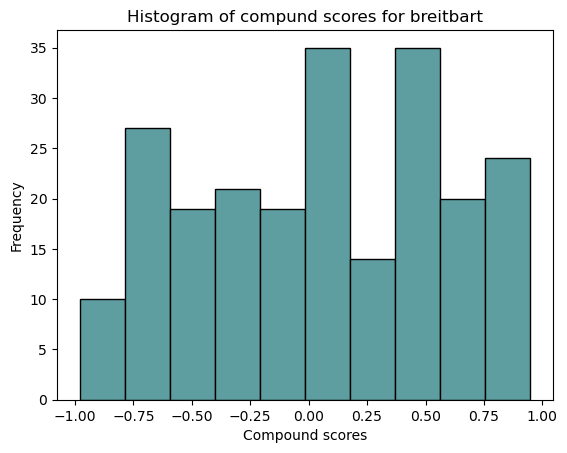

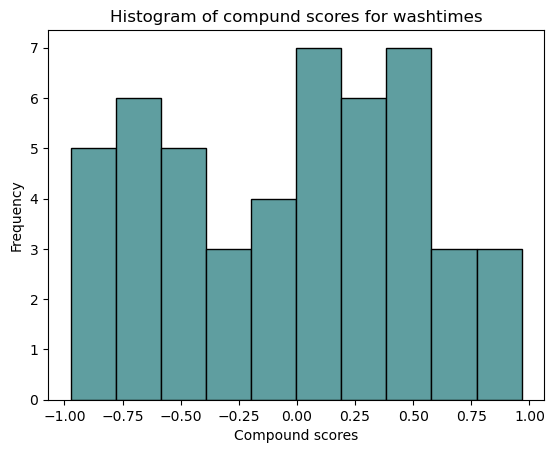

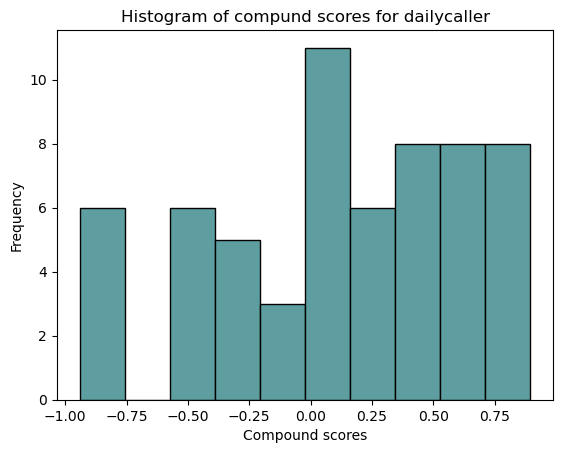

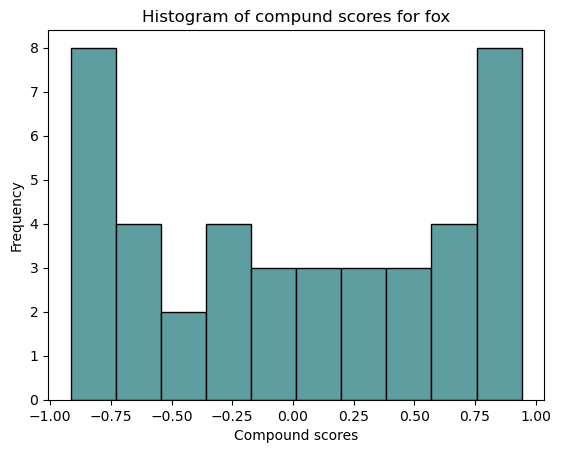

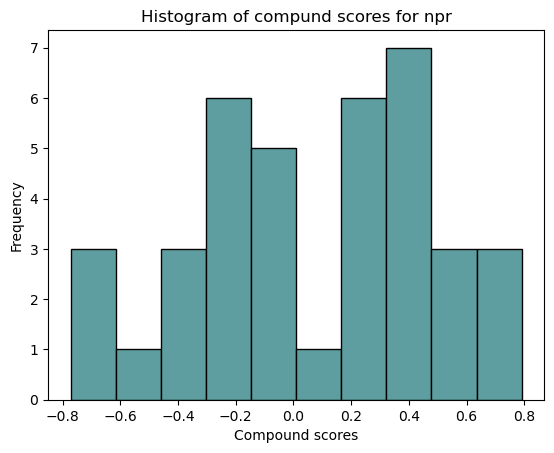

In [72]:
for source in covid_df["source"].unique():
    plt.hist(covid_df[covid_df["source"]==source]["compound_Document"],
             bins=10, color='cadetblue', edgecolor ="black")
    plt.xlabel('Compound scores')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of compund scores for {source}')
    plt.show()
    

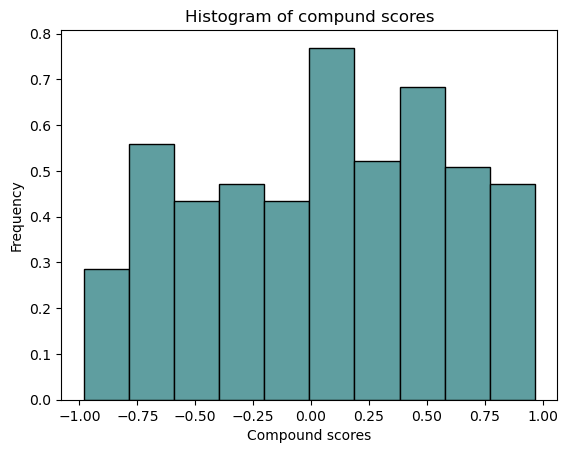

In [73]:
plt.hist(covid_df["compound_Document"], bins=10, color='cadetblue',
         edgecolor = "black",density=True)
plt.xlabel('Compound scores')
plt.ylabel('Frequency')
plt.title('Histogram of compund scores')
plt.show()

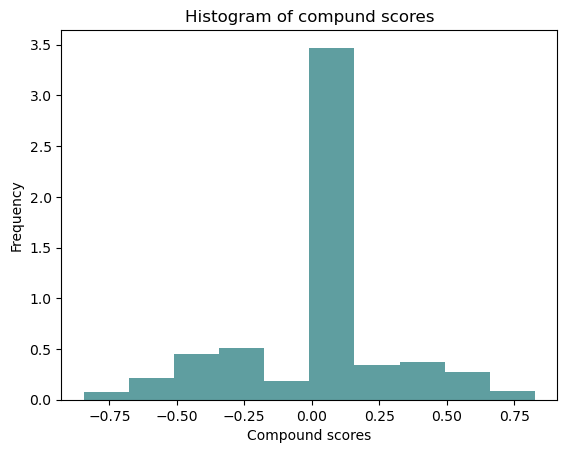

In [54]:
plt.hist(covid_df["compound_title"], bins=10, color='cadetblue',density=True)
plt.xlabel('Compound scores')
plt.ylabel('Frequency')
plt.title('Histogram of compund scores')
plt.show()

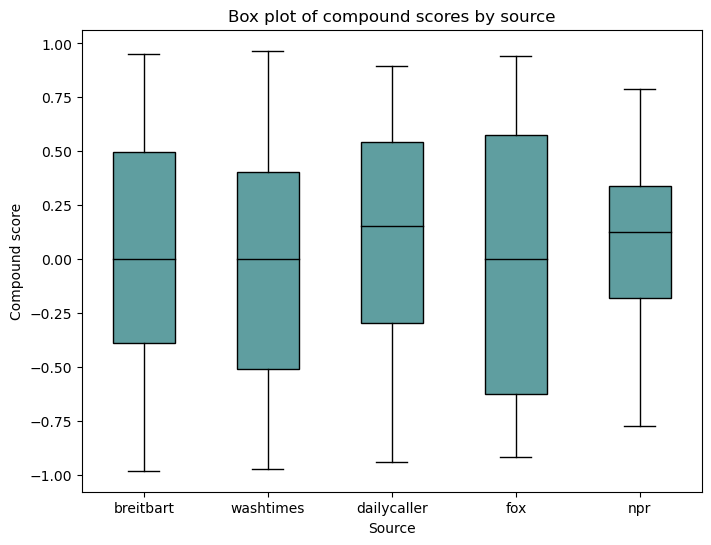

In [62]:
source_scores = [covid_df[covid_df["source"]==source]["compound_Document"] for source in covid_df["source"].unique()]

plt.figure(figsize=(8, 6))
plt.boxplot(source_scores, labels=covid_df["source"].unique(),
            patch_artist=True, medianprops=dict(color="black"),boxprops=dict(facecolor="cadetblue"))
plt.xlabel("Source")
plt.ylabel("Compound score")
plt.title("Box plot of compound scores by source on title and start of article")
plt.show()

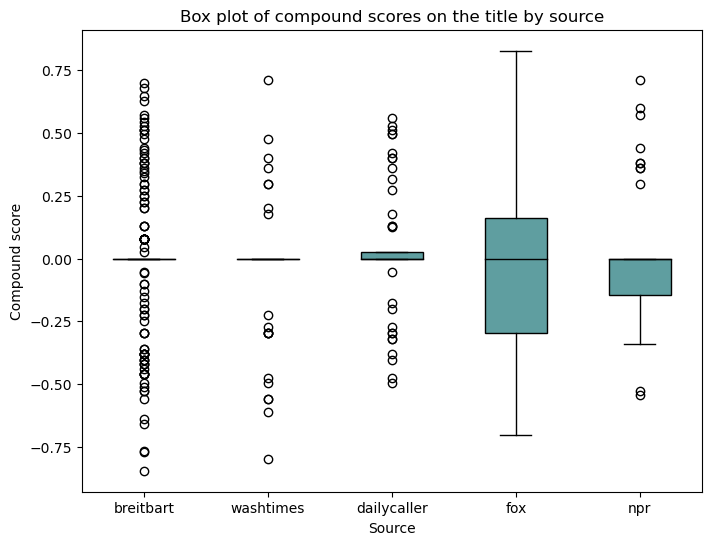

In [64]:
source_scores = [covid_df[covid_df["source"]==source]["compound_title"] for source in covid_df["source"].unique()]

plt.figure(figsize=(8, 6))
plt.boxplot(source_scores, labels=covid_df["source"].unique(),
            patch_artist=True,medianprops=dict(color="black"),boxprops=dict(facecolor="cadetblue"))
plt.xlabel("Source")
plt.ylabel("Compound score")
plt.title("Box plot of compound scores on the title by source")
plt.show()

In [25]:
for row in covid_df.sort_values(by=["compound"])[:100].itertuples():
    print(row.title)

beijing seizes 89 million defective masks as complaints grow about low quality chinese supplies
          florida face mask hell a chilling warning for america        
bruce springsteen freaks out on trump in coronavirus rant: ‘put on a f**king mask’
‘not based on science’: rep. massie refuses pelosi mask mandate for floor vote
          houston police balk at enforcing county’s ‘idiotic’ mask order with $1,000 fines        
nolte: gop lawmakers kill dem governor’s stupid mask mandate
maryland voter arrested after refusing to wear a mask at polling site
house republican calls for ban on stylized masks on house floor after lawmaker dons mask ‘covered in marijuana leaves’
          gary jenkins, pullman police chief: wear a mask or face year in jail, $5k fine        
rep. jerry nadler snaps at republican committee members for not wearing masks
pelosi rips trump for not wearing mask: ‘it’s a vanity thing’
fauci laments that masking must now be a ‘personal choice’
new jersey gov. phil murp

In [26]:
#First 100 titles of articles with higher 
for row in covid_df.sort_values(by=["compound"],ascending = False)[:100].itertuples():
    print(row.title)

          joe biden praises chris christie for promoting mask-wearing        
fauci: wearing masks ‘also help protect us against influenza’
kirk cousins clarifies ‘if i die, i die’ comments
hilarie burton says she's been sewing masks for health care workers, encourages fans to do the same
joe biden: golden rule means we need mask mandates nationwide
italy to distribute free masks to virus-stricken nursing homes
pelosi: trump going into crowds without masks was ‘brazen invitation’ to coronavirus
sources: ford worker who tested positive for coronavirus ‘had to be reminded numerous times’ to wear face mask
army of military children decorate masks for front-line heroes
co gov. polis: trump should use platform to encourage mask use
actress amber tamblyn fundraising for pro-abortion group with ‘are we great again yet?’ masks
joe biden promises to push elected officials into issuing mask mandates nationwide
trump campaign to push masks, hand sanitizer at outdoor new hampshire rally
internet c